### Cifar-10 이미지 분류 v1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 탐색 및 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

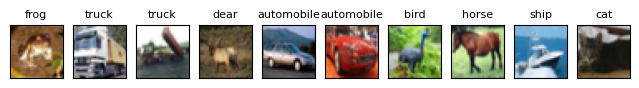

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i]), plt.xticks([]), plt.yticks([])
  plt.title(class_names[y_train[i, 0]], fontsize=8)
plt.show()

In [5]:
# X data scaling
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
# y data one-hot-encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=5)


In [10]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=32, callbacks=[mc, es])

Epoch 1/100
1246/1250 [============================>.] - ETA: 0s - loss: 1.5674 - accuracy: 0.4306
Epoch 1: val_loss improved from inf to 1.17834, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 21s 7ms/step - loss: 1.5664 - accuracy: 0.4310 - val_loss: 1.1783 - val_accuracy: 0.5795
Epoch 2/100
  23/1250 [..............................] - ETA: 6s - loss: 1.2036 - accuracy: 0.5421

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1241/1250 [============================>.] - ETA: 0s - loss: 1.1642 - accuracy: 0.5850
Epoch 2: val_loss improved from 1.17834 to 0.96679, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1628 - accuracy: 0.5855 - val_loss: 0.9668 - val_accuracy: 0.6578
Epoch 3/100
1242/1250 [============================>.] - ETA: 0s - loss: 1.0062 - accuracy: 0.6468
Epoch 3: val_loss improved from 0.96679 to 0.93503, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0060 - accuracy: 0.6469 - val_loss: 0.9350 - val_accuracy: 0.6743
Epoch 4/100
1247/1250 [============================>.] - ETA: 0s - loss: 0.9109 - accuracy: 0.6779
Epoch 4: val_loss improved from 0.93503 to 0.88304, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9115 - accuracy: 0.6777 - val_loss: 0.8830 - val_accuracy: 0.6920
Epoch 5/100
1240/1250 [============================>.] 

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.7723


[0.6938084363937378, 0.7723000049591064]

- 시각화

In [12]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

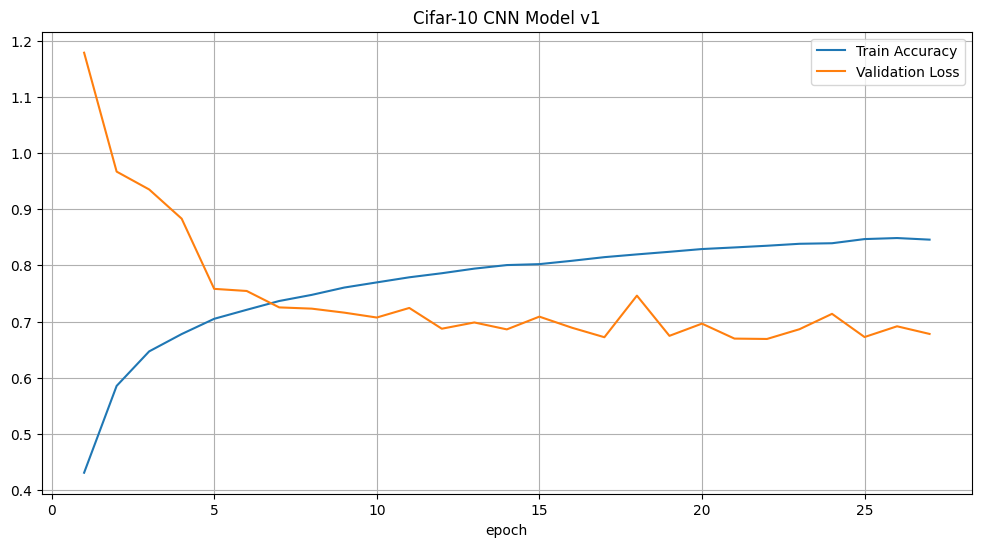

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(xs, y_acc, label='Train Accuracy')
plt.plot(xs, y_vloss, label='Validation Loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.title('Cifar-10 CNN Model v1')
plt.show()